In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pandas.api.types import CategoricalDtype

# !pip install calmap
import calmap
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

# **Part 1: Visualizing patterns in the data**

### Weekly Patterns

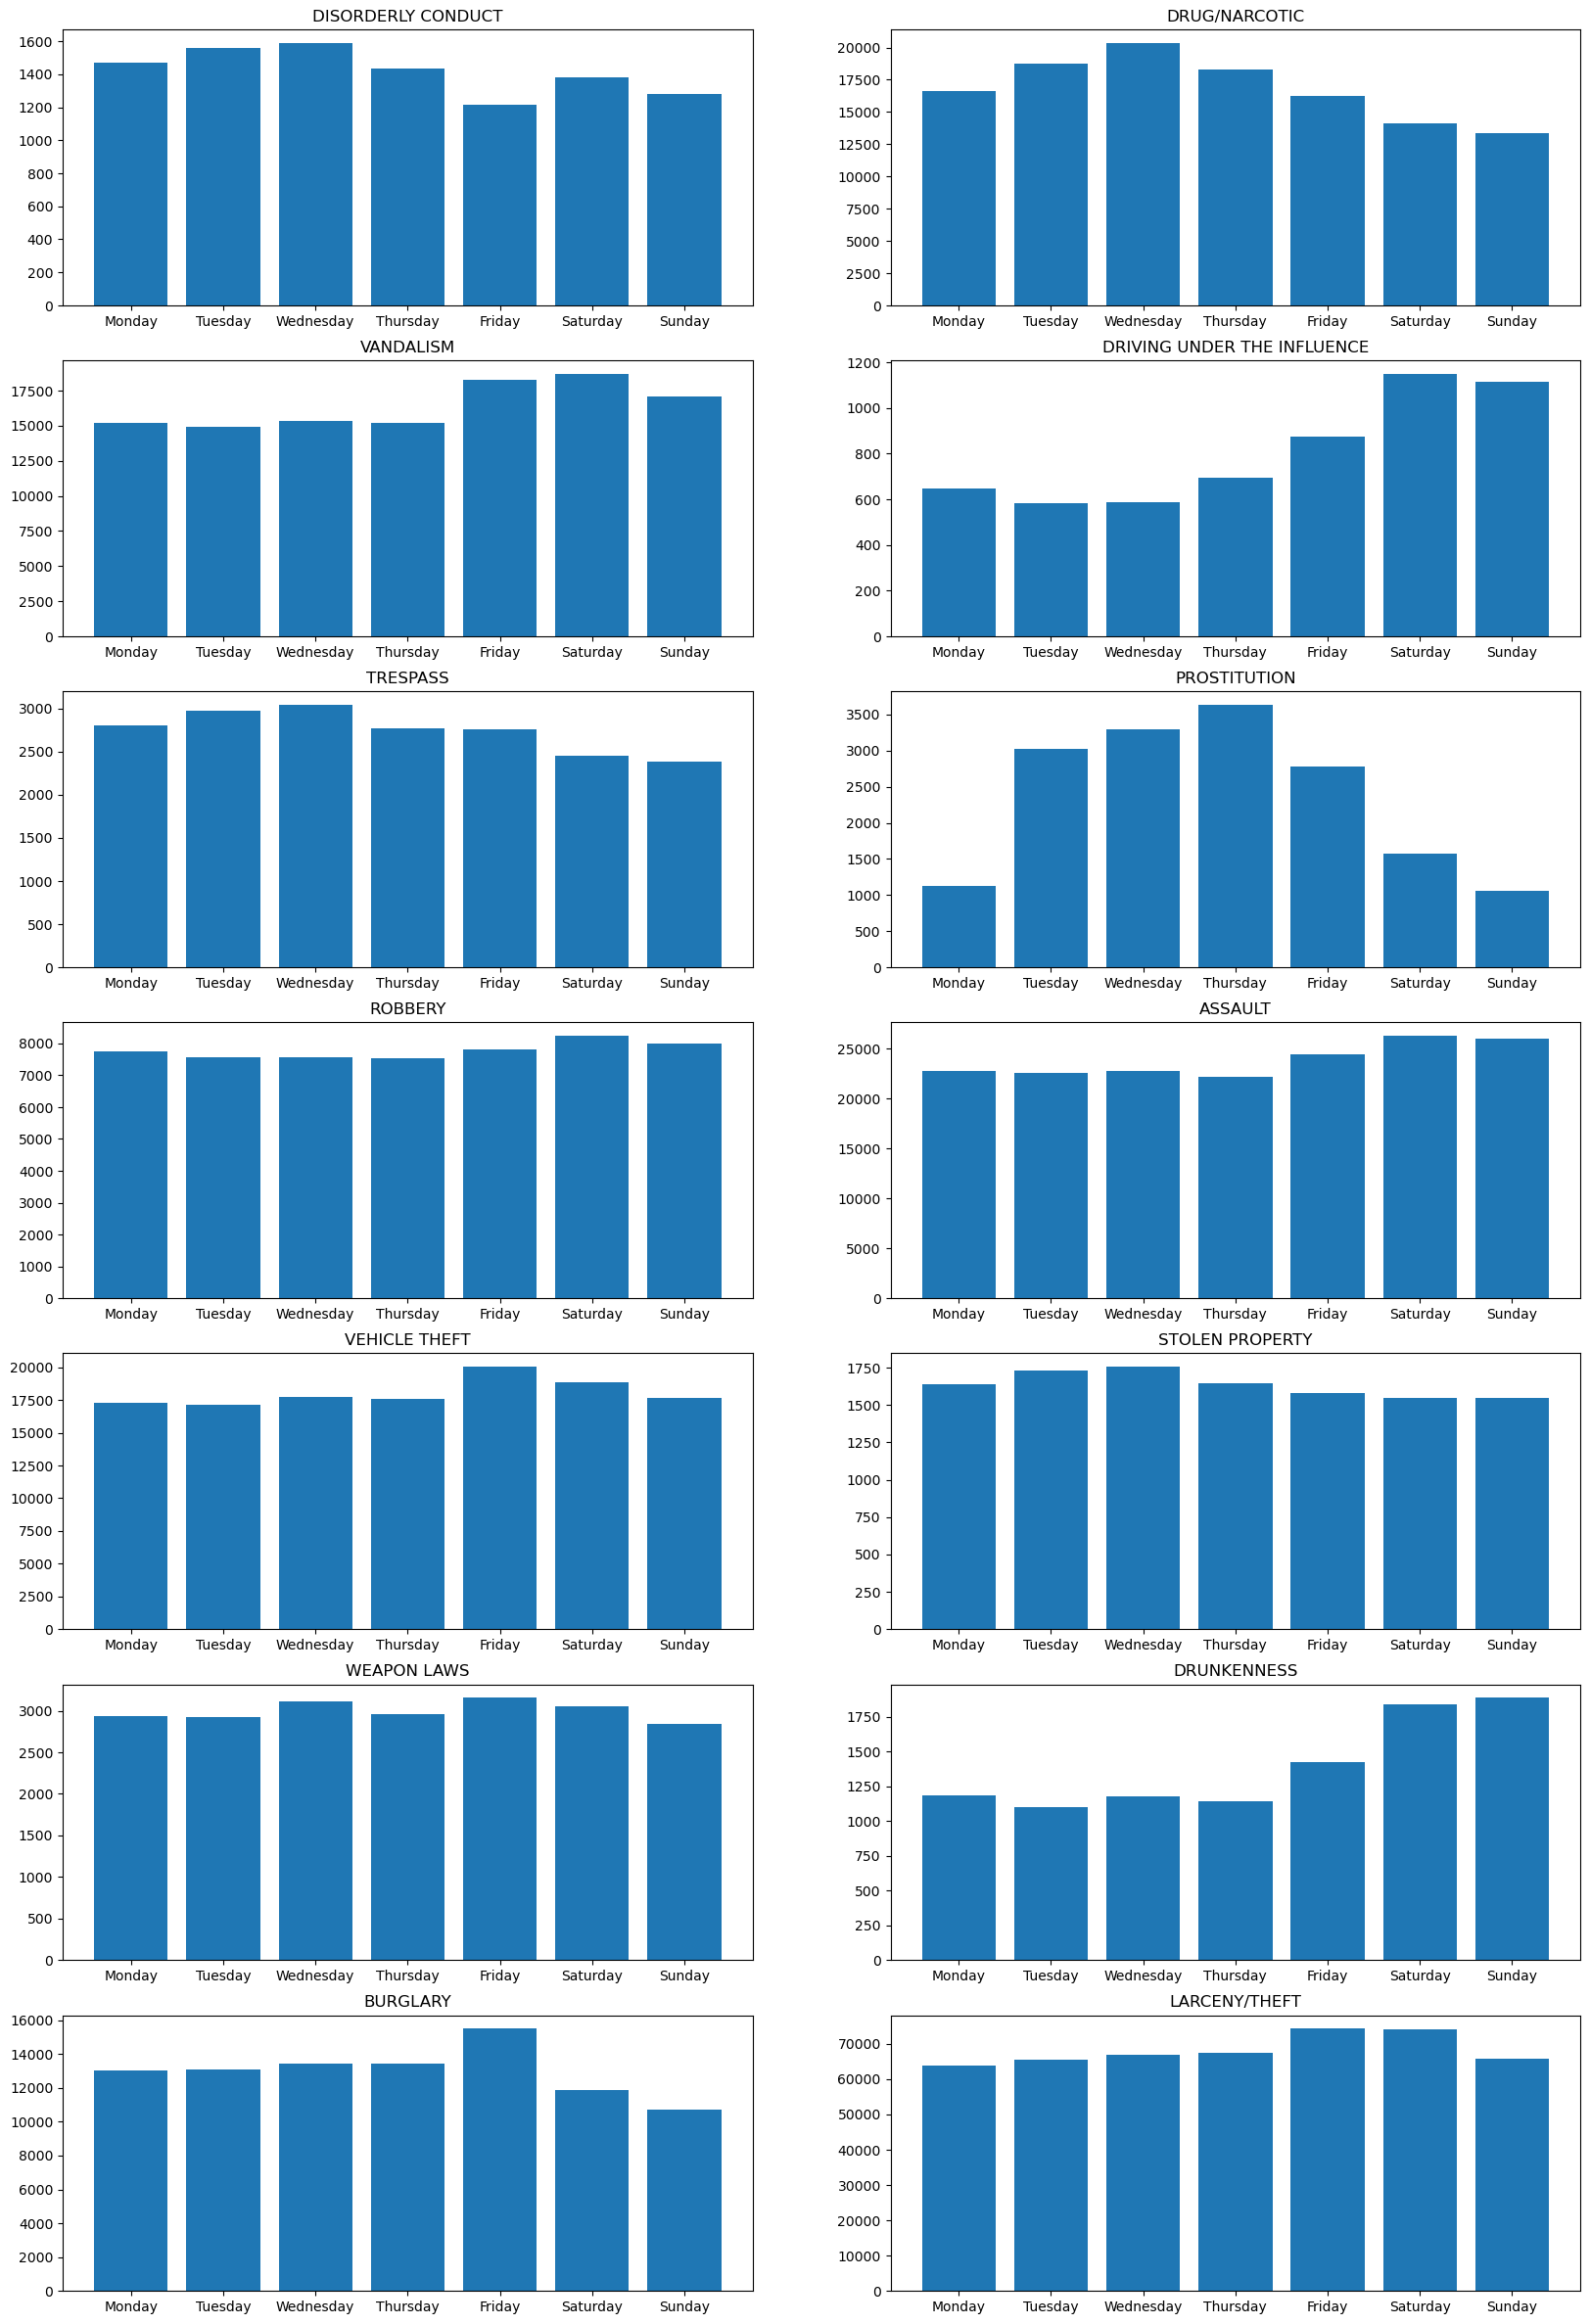

In [2]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# sorterIndex = dict(zip(days,range(len(days))))
# data['Day_id'] = data['DayOfWeek'].map(sorterIndex)
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(days)), xticklabels=days)

axs = axs.ravel()
i = 0

for crime in focuscrimes:
# acqire data for each type of crime
    crime_data = data[data["Category"].isin([crime])]
    data_dayofweek = crime_data['DayOfWeek'].value_counts().reindex(days) 
# draw bar chart 
    axs[i].bar(data_dayofweek.index.tolist(),data_dayofweek.tolist())  # bar(x,y)
    axs[i].set_title(crime)
    i += 1
plt.show()

## Monthly Patterns

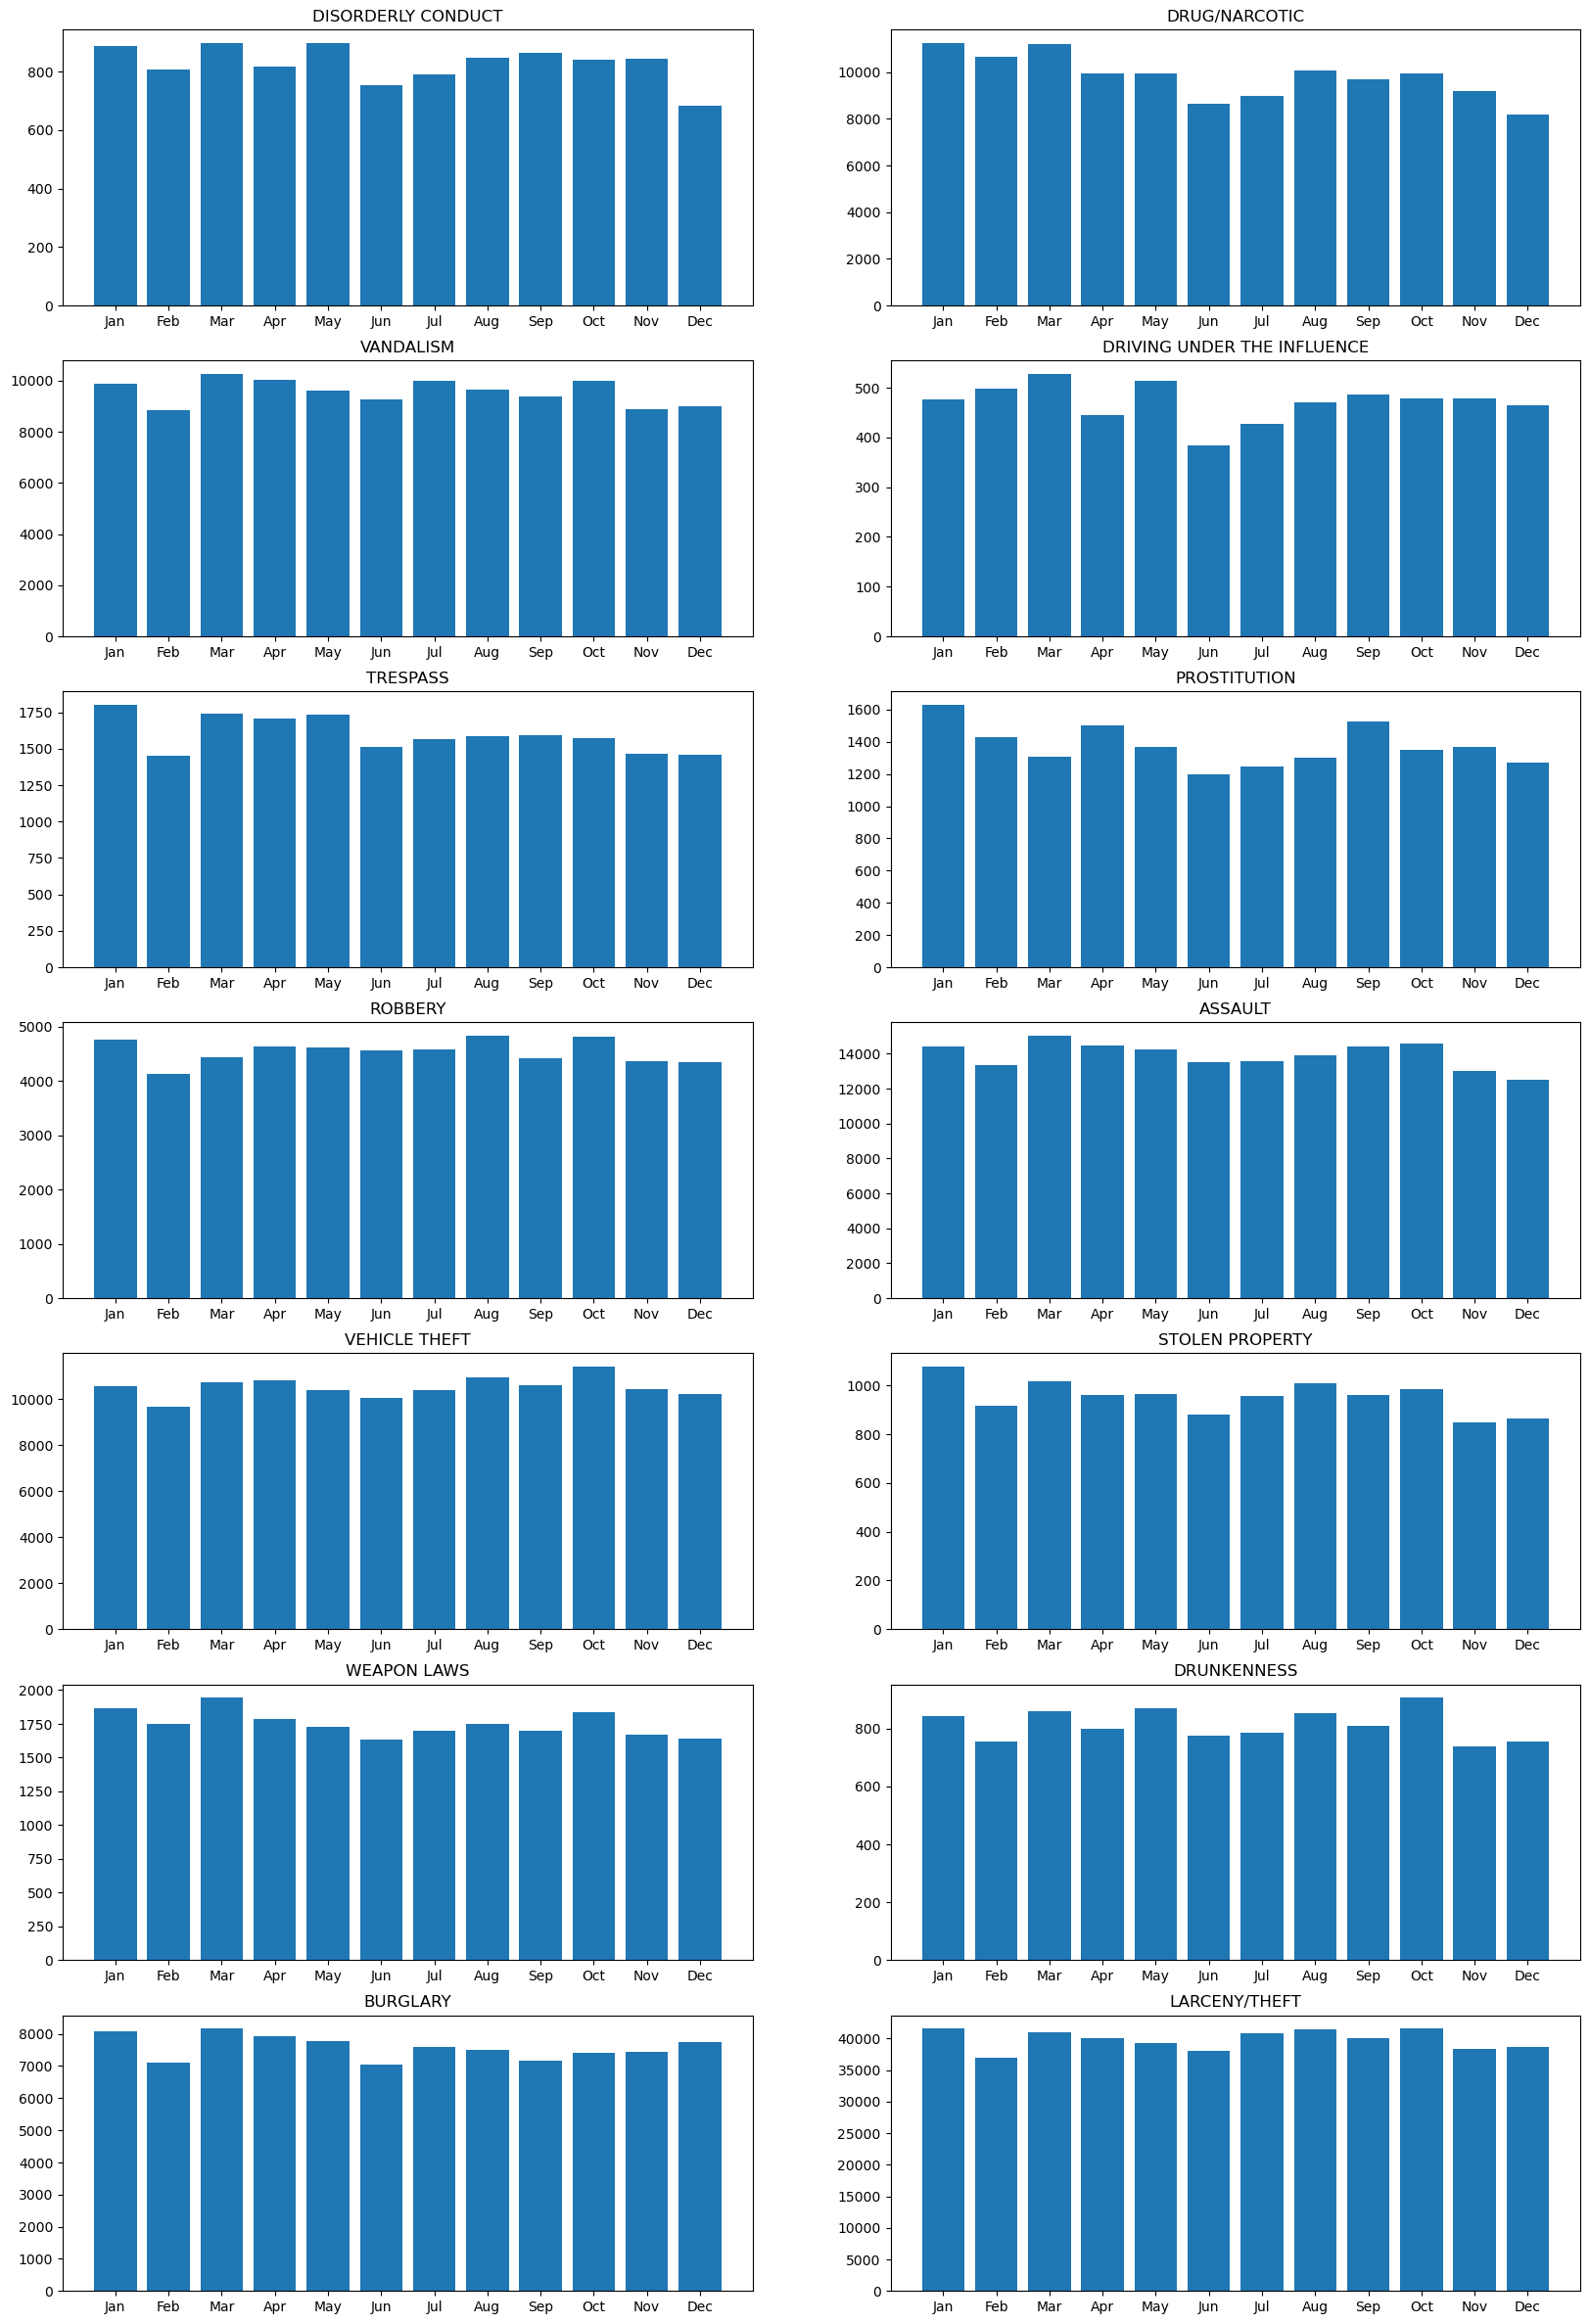

In [3]:
# Months patterns

data['Date'] = pd.to_datetime(data['Date'])

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(months)), xticklabels=months)

axs = axs.ravel()
i = 0

for crime in focuscrimes:
    focus_crime_count=pd.DatetimeIndex(data[data.Category==crime].Date).month.value_counts().sort_index()
    axs[i].bar(np.arange(len(focus_crime_count)), focus_crime_count.tolist())
    axs[i].set_title(crime)
    i+=1

plt.show()


## The 24 hour cycle 

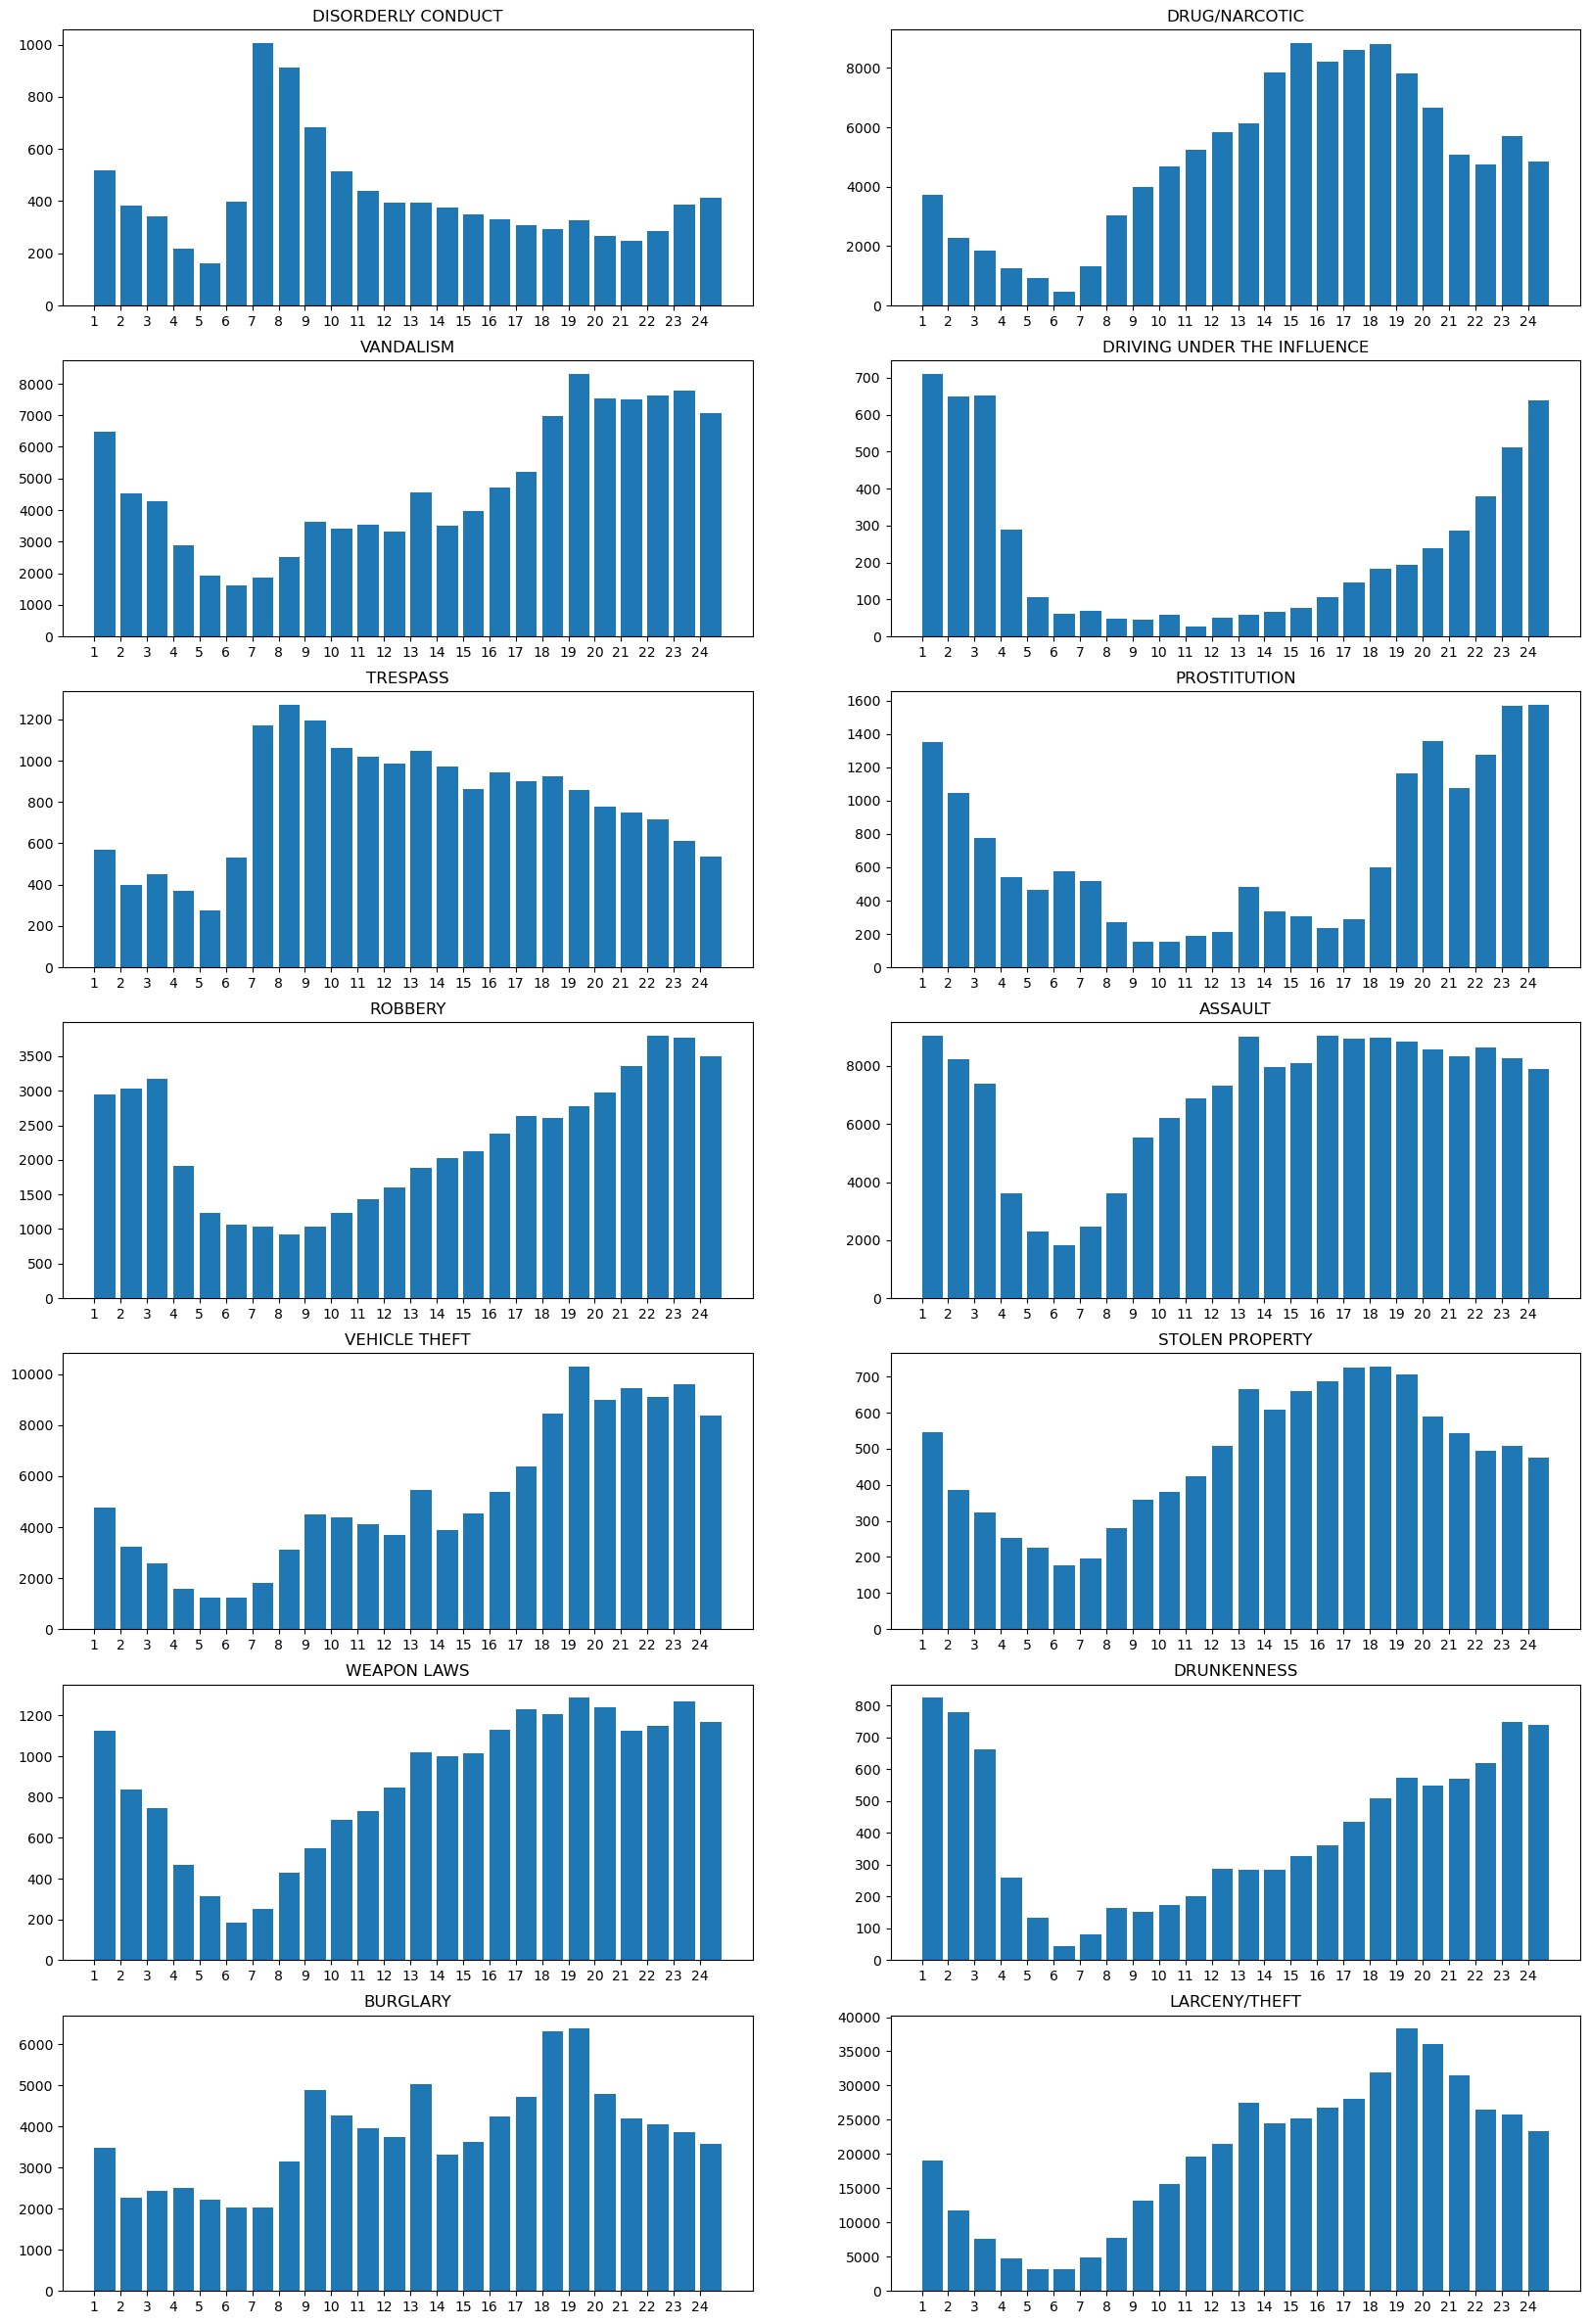

In [4]:
hours = np.arange(1,25,1)
# time labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']

fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(20,30))
plt.setp(axs, xticks=np.arange(len(hours)), xticklabels=hours)

axs = axs.ravel()
i = 0
for crime in focuscrimes:
    # plt.figure()
    crime_data = data[data["Category"].isin([crime])]
    CrimeData = crime_data.copy()
    CrimeData['Time'] = pd.to_datetime(CrimeData['Time'])
    # CrimeData['hour_interval'] = pd.cut(CrimeData['Time'].dt.hour, bins, labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'])
    CrimeData['hour_interval'] = CrimeData['Time'].dt.hour
    CrimeDataHour = CrimeData['hour_interval'].value_counts().sort_index()

    axs[i].bar(CrimeDataHour.index.tolist(), CrimeDataHour.tolist(),align='edge')
    axs[i].set_title(crime)
    i += 1

plt.show()

## 168 hours of the week

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

sorterIndex = dict(zip(days,range(len(days))))
data['Day_id'] = data['DayOfWeek'].map(sorterIndex)
# data.info()

C:\Users\s\AppData\Local\Temp\ipykernel_11864\4139424121.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



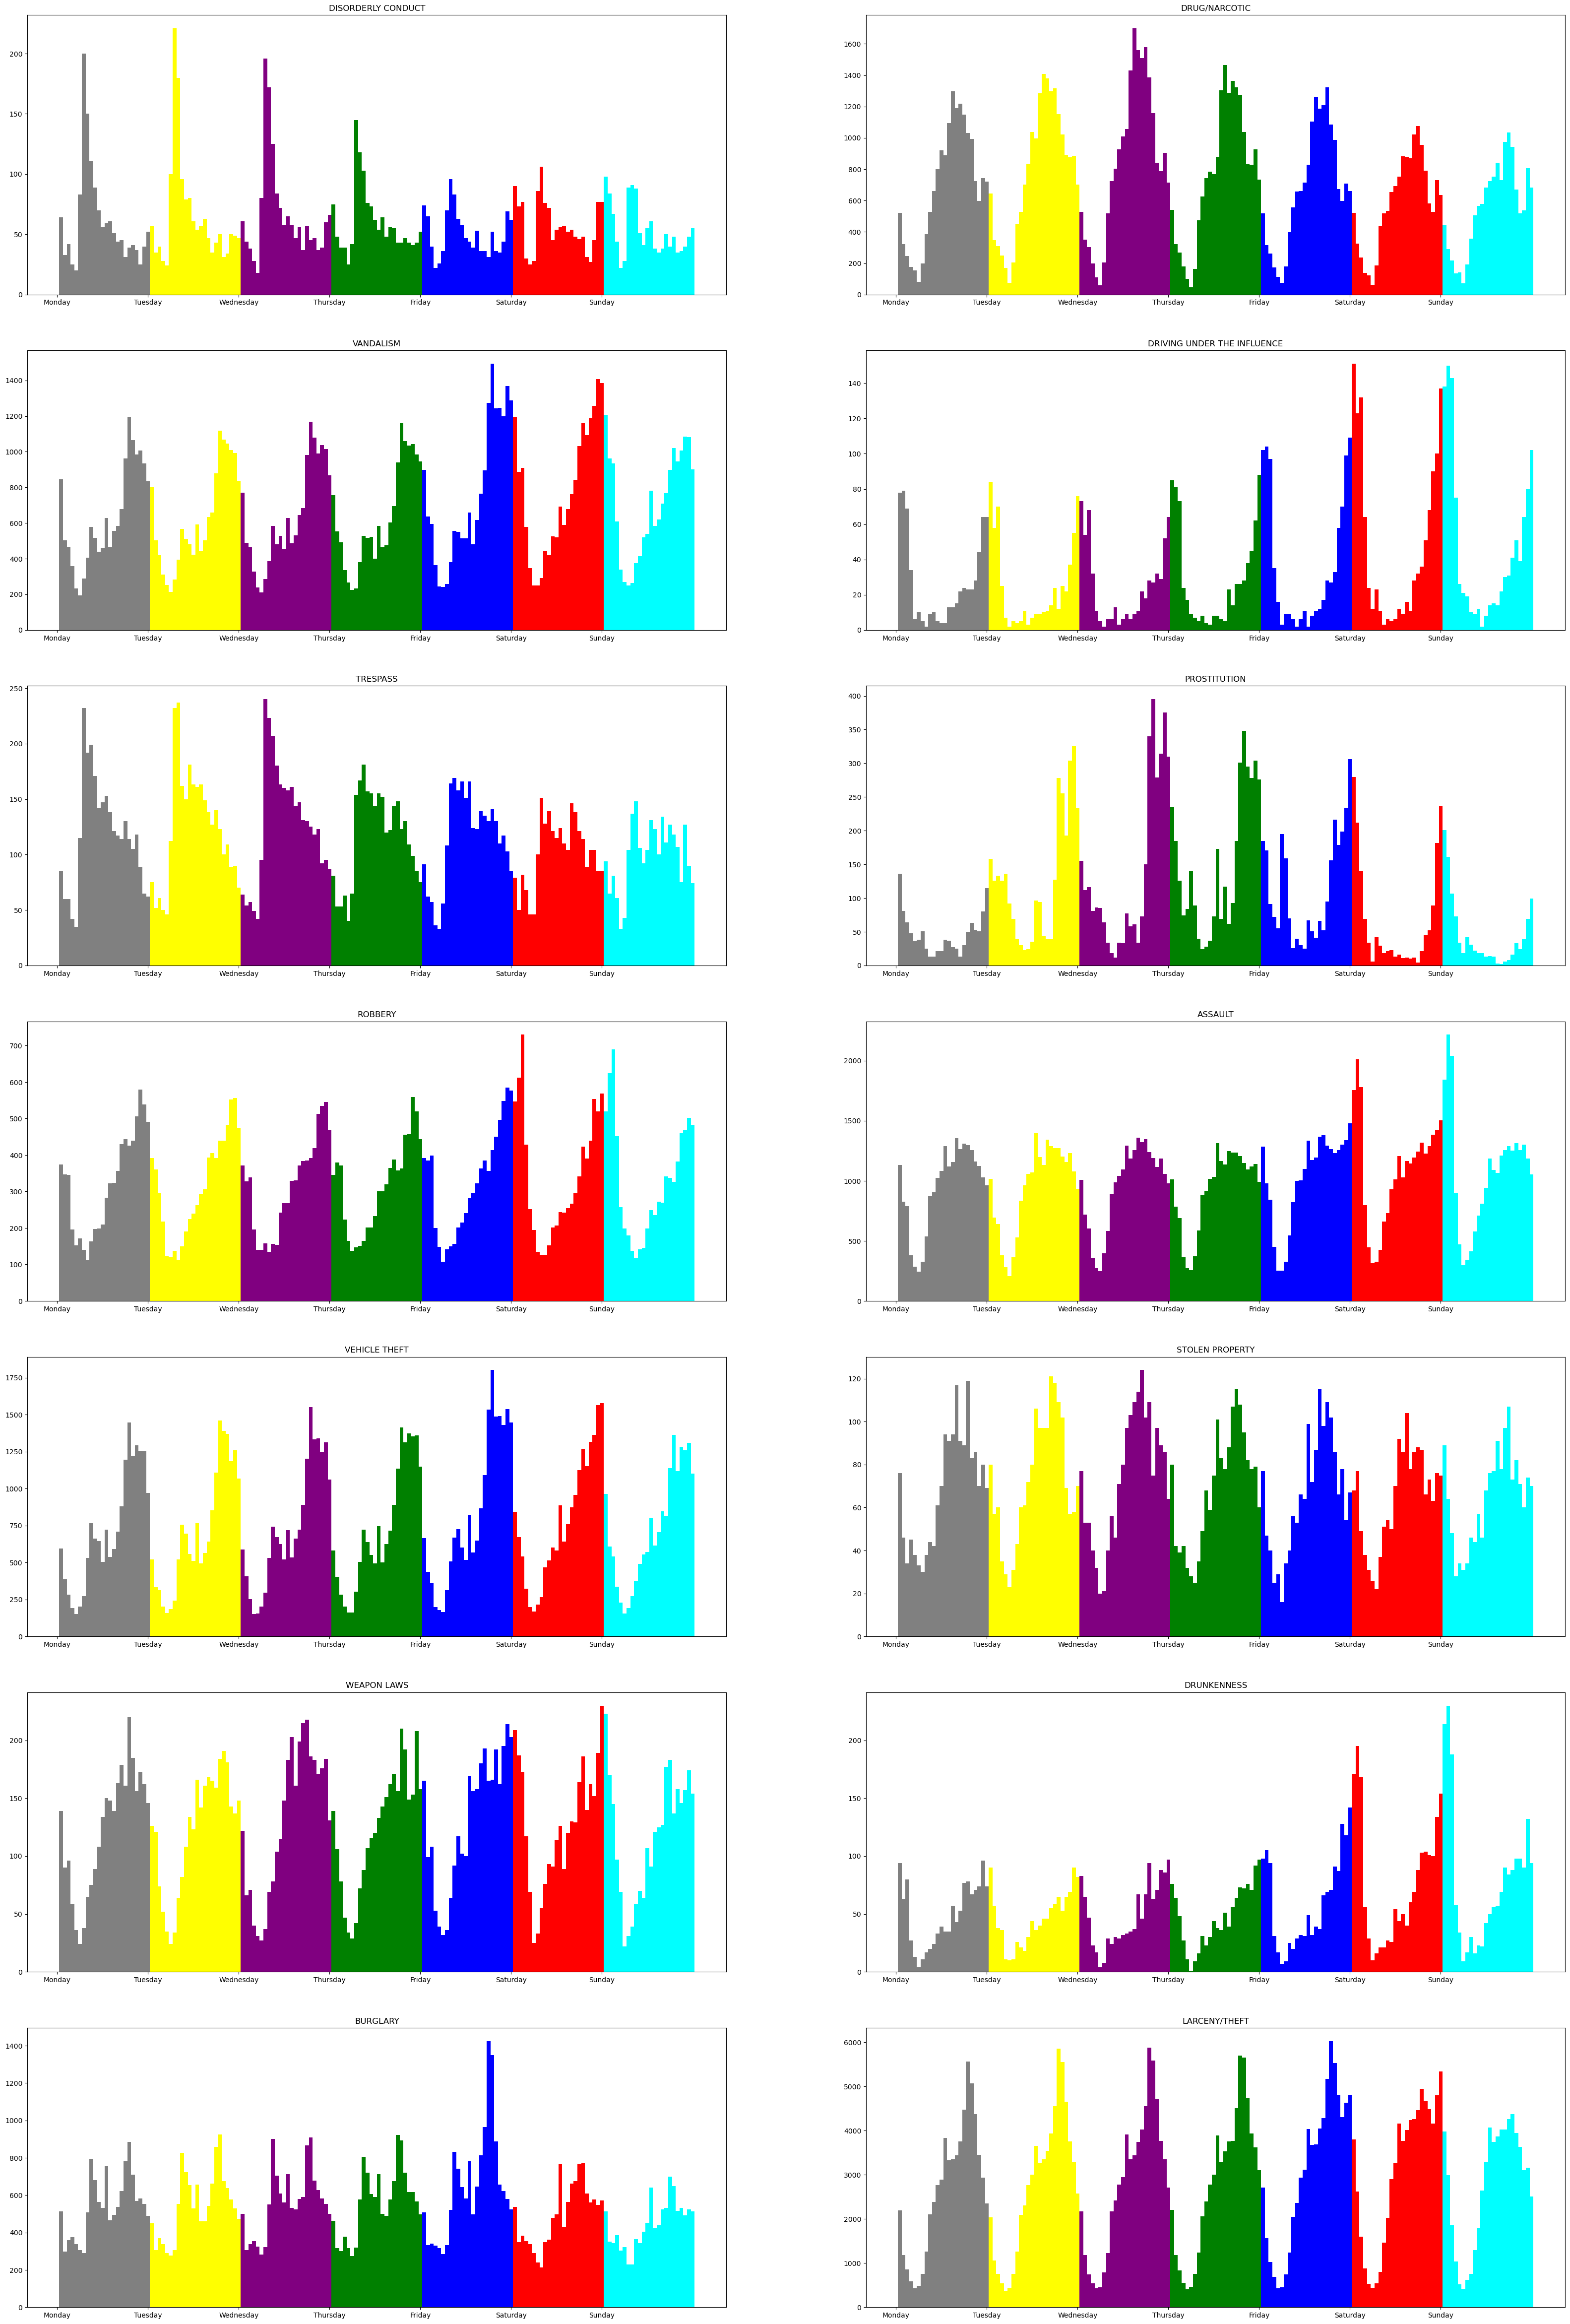

In [17]:
x = np.arange(len(days))
width = 1
fig, axs = plt.subplots(int(len(focuscrimes)/2),2,figsize=(40,60))
plt.setp(axs, xticklabels=days,xticks=x)
axs = axs.ravel()
i=0
for crime in focuscrimes :
    w=1
    crime_data = data[data["Category"].isin([crime])]
    for h in range(24):
        test=np.array(data[(data.Time.dt.hour==h) & (data.Category==crime)].Day_id.value_counts().sort_index())
        axs[i].bar(x+w*(width/24), test,width/24, color=['grey', 'yellow', 'purple','green', 'blue','red', 'cyan'])
        w+=1
    axs[i].set_title(crime)
    i+=1
plt.show()


## Calendar Plot of ROBBERY

<AxesSubplot:>

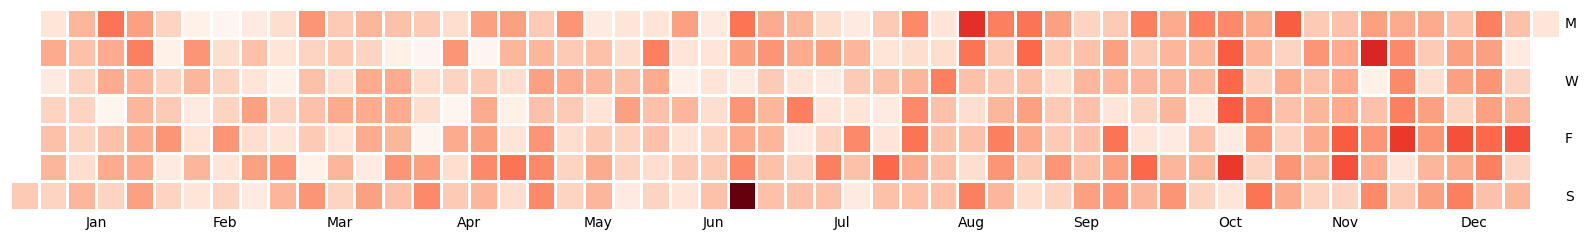

In [7]:
# Calendar plots : ROBBERY
# !pip install calmap
# import calmap
Cal_data = data[(data['Category'] == 'ROBBERY') & (data['Date'].between('2012-01-01','2012-12-31'))]
value_data = Cal_data['Date'].value_counts().sort_index()
plt.rcParams["figure.figsize"]=20,20    #change the size of the calendar plot
calmap.yearplot(value_data, year = 2012, daylabels='MTWTFSS',dayticks=[0, 2, 4, 6])


 We found that the frequency of 'ROBBERY' on June 24 is 33, it is a dark red plot in the calender pattern, it is unusual,(or maybe it is a human noise.) It's also possible that certain events or circumstances, such as holidays or large gatherings, may increase the likelihood of theft occurring.


## A polar plot of ASSAULT's 24hour cycle

In [8]:
Pol_data = data[(data['Category'] == 'ASSAULT')]
Pol_value_data = Pol_data['Time'].dt.hour.value_counts().sort_index()

df = pd.DataFrame(list(Pol_value_data.items()), columns=['Hour', 'Value'])
# Create a new dataframe for the polar plot.


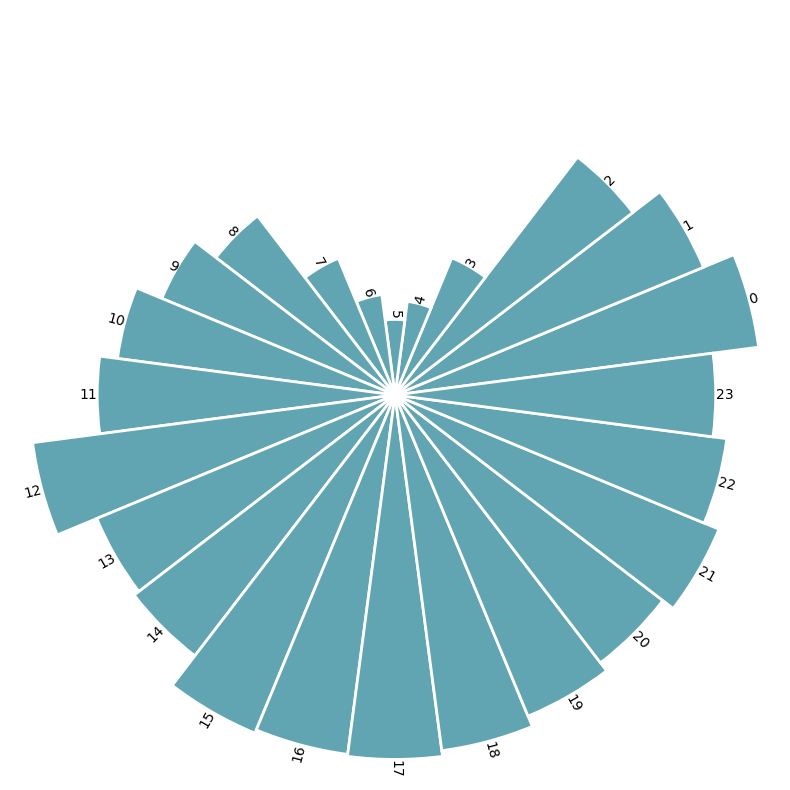

In [9]:
# this polar plot is sorted based on the hour information
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30
labelPadding = 4
max = df['Value'].max()


slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)
df = pd.DataFrame(list(Pol_value_data.items()), columns=['Hour', 'Value'])
# df

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Hour"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

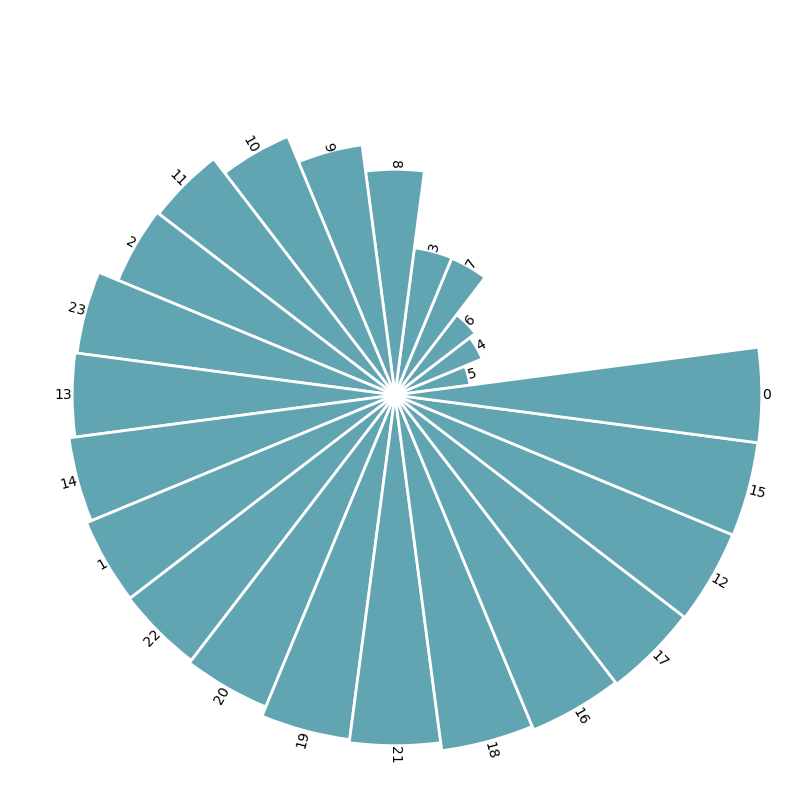

In [10]:
# this polar plot is sorted based on the Value information
# Build a dataset

df = pd.DataFrame(list(Pol_value_data.items()), columns=['Hour', 'Value'])
# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Hour"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

The frequency of 'ASSAULT' at midnight is so high. It is possible that people may perceive more danger or vulnerability when they are out late at night, particularly if they are alone or in a less populated area, which could make them more likely to become victims of assault. Additionally, certain types of establishments or events that occur at night, such as bars or parties, may be associated with higher rates of assault. However, it's important to note that these factors are not exclusive to midnight and assaults can happen at any time.

# **Part 2: Dataviz questions**

**Question 1: 10 examples of ways we can encode data**


1. position 2. length 3. area 4. shape 5. color 6. angle 7. line weight 8. line ending 9. texture 10. pattern


**Question 2: Are all encodings created equally? Why not? Can you think of an example from the previous lectures?**


Not really. Different encoding methods have different strengths and weaknesses, and the best encoding method to use depends on the specific data and message being conveyed. Some encodings are good at revealing some aspects of data while others are not the same.

For example, the histograms could let us easily realize how probable it is to find a specific data or a data region, while jitter plots make it easier to see the density and distribution of the whole data.

**Question 3: Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?**


1. Angle 2. Area/Size 3. Color intensity

Example: A Map of Every Wind Turbine in the U.S. — Interactive USGS Map Shows Locations of More than 47,000 (and Counting). The turbines are color-coded by size, but most of them look totally the same.

https://blog.ucsusa.org/john-rogers/usgs-map-of-wind-turbine-locations-in-us-434/

**Question 4: Explain in your own words: What is the problem with pie-charts?**

1. When similar proportions of slices appear, it is difficult to intuitively distinguish the size relationship (The first vedio of week 4) .
2. When a pie chart contains too many slices, or when multiple slices of very small proportions are grouped together, it becomes poorly visible.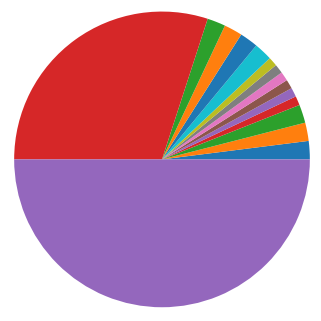
3. When the task (such as Part 2 of the Week 4 exercise) is not satisfied with dividing time into time periods, but expects to display data changes in a continuous way, pie charts cannot achieve this.

# **Part 3: Visualizing geodata using Plotly**

In [11]:
# draw a map, based on the randomdata and the geojson file
# sunday 
# VEHICLE THEFT

import plotly.express as px
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    countries = json.load(response)
    
data_safety = data[(data['DayOfWeek'] == 'Sunday') & (data['Category'] == 'VEHICLE THEFT') ]
Final_data = data_safety['PdDistrict'].value_counts()


# Convert dictionary to a DataFrame
df = pd.DataFrame(list(Final_data.items()), columns=['DISTRICT', 'values'])

 
fig = px.choropleth_mapbox(df, geojson = countries, locations = 'DISTRICT', color ='values',
                          color_continuous_scale = "Viridis",
                          range_color = (0,50),       
                  #  we could change the "range_color" based on the "Final_data"
                          mapbox_style = "carto-positron",
                          zoom = 11, center = {"lat":37.7749 , "lon":-122.4194 },
                          opacity = 0.5,
                          labels ={'color':'Number of Crimes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Based on the map, the safest place that we could park a car on Sunday is TENDERLOIN, while the worst place is INGLESIDE.

In [13]:
fig = px.choropleth_mapbox(df, geojson = countries, locations = 'DISTRICT', color ='values',
                          color_continuous_scale = "Viridis",
                          range_color = (0,500),       
                          mapbox_style = "carto-positron",
                          zoom = 11, center = {"lat":37.7749 , "lon":-122.4194 },
                          opacity = 0.5,
                          labels ={'color':'Number of Crimes'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

When the color value range is too large, the difference between values in different regions is small in the whole value range, so it usually shows similar colors. This is because the difference is not enough to be reflected in the color representation.

Taking color perception as an example, we often expect different color representations to guide our actions or judgments. When the color perceptual  error occurs, we may cause bad results because of the wrong judgment. For example, if the three lights of a traffic light are changed to light yellow, orange yellow and gold yellow, people can easily cause traffic problems because they cannot correctly perceive which light is working.

# **A1 Part 4: Errors in the data**

Q1:

In Example 1, this error could result in an overrepresentation of crime on Thursdays compared to other days of the week.

In Example 2, this error may result in incorrect temporal distribution of the crime. Specifically, it may be that the time of the crime which should be more dispersed, is incorrectly clustered at some particular points in time.

In Example 3, this error could cause the location of the crime to appear wrong on the map, such as in a government office.

Q2:

If the binned versions of the data are used for real use in San Francisco, it may lead to a waste of police resources and put at risk areas that really need attention. Besides, since our model may not accurately reflect the real pattern of crime in San Francisco, this can lead to incorrect analysis and statistics about the type of crime or the location of the crime, resulting in poor modeling efforts.

Q3:

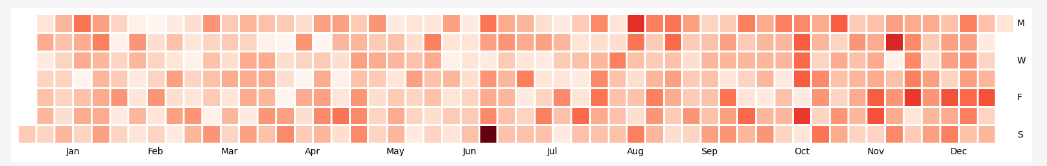
We are not sure why the frequency of 'ROBBERY' on June 24 is 33, which is so high and is a deep red.
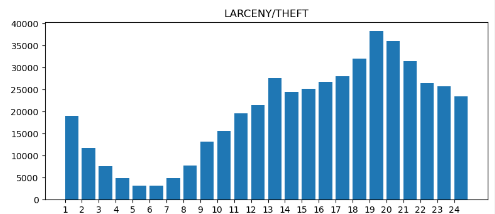

We don't know why the frequency of 'LARCENY/THEFT' during 13.00 to 14.00 is higher than the other recent time
